In [4]:
%load_ext autoreload
%autoreload 2

from multicamera_acquisition.acquisition import refactor_acquire_video, AcquisitionLoop, reset_loggers
from multicamera_acquisition.writer import NVC_Writer, FFMPEG_Writer
from multicamera_acquisition.interfaces.microcontroller import Microcontroller 
from multicamera_acquisition.config import (
    load_config,
)

import datetime


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# Recording params
fps = 90
rec_time_s = 10
base_path = R'D:\Jonah\2023_12_26_6cam_testing\tmp'
mouse = "J01701"
logging_level = "INFO"
config_filepath = R'D:\Jonah\2023_12_26_6cam_testing\recording_config.yaml'

In [6]:
config = load_config(config_filepath)

In [7]:
config

{'acq_loop': {'display_every_n': 1,
  'dropped_frame_warnings': False,
  'max_frames_to_acqure': None},
 'cameras': {'azure_bottom': {'brand': 'azure',
   'depth_mode': 'NFOV_UNBINNED',
   'display': {'display_frames': False, 'display_range': (0, 255)},
   'fps': 30,
   'id': '000693321712',
   'name': 'azure_bottom',
   'subordinate_delay_off_master_usec': 0,
   'sync_mode': 'subordinate',
   'synchronized_images_only': False,
   'trigger': {},
   'writer': {'camera_name': 'azure_bottom',
    'depth': False,
    'fps': 30,
    'gpu': None,
    'loglevel': 'debug',
    'max_video_frames': 2592000,
    'output_px_format': 'yuv420p',
    'pixel_format': 'gray8',
    'preset': 'ultrafast',
    'quality': 15,
    'type': 'ffmpeg',
    'video_codec': 'libx264'},
   'writer_depth': {'camera_name': 'azure_bottom',
    'depth': True,
    'fps': 30,
    'gpu': None,
    'loglevel': 'error',
    'max_video_frames': 2592000,
    'pixel_format': 'gray16',
    'quality': 15,
    'type': 'ffmpeg',
 

In [9]:
datestr = datetime.datetime.now().strftime("%Y%m%d")
recording_name = f"{datestr}_{mouse}"
recording_name

'20240123_J01701'

2024-01-23 15:56:25,941 - main_acq_logger - INFO - Finding microcontroller...
2024-01-23 15:56:37,152 - main_acq_logger - INFO - Starting cameras...
INFO:main_acq_logger:Starting cameras...
2024-01-23 15:56:38,201 - main_acq_logger - INFO - Starting microcontroller...
INFO:main_acq_logger:Starting microcontroller...


Recording Progress: 10.0%

2024-01-23 15:56:50,482 - main_acq_logger - INFO - Ending processes, this may take a moment...
INFO:main_acq_logger:Ending processes, this may take a moment...
2024-01-23 15:56:50,482 - main_acq_logger - INFO - Done.
INFO:main_acq_logger:Done.


Recording Progress: 100%

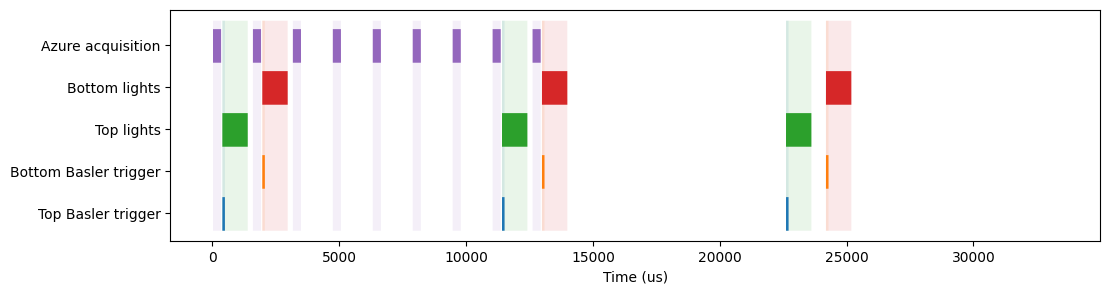

In [3]:
reset_loggers()

save_loc, first_video_file_name, full_config = refactor_acquire_video(
    base_path,
    config,
    recording_duration_s=rec_time_s,
    recording_name=recording_name,
    append_datetime=False,
    overwrite=False,
    logging_level=logging_level
)